## Summary
<p>
The goal of this project to predict credit card approval based on machine learnin algorithms.
In principle the data science workflow conducted here could be incorporated into 
a production system supporting financial instutitions like banks or other financial service companies
to make decisions in short time frames. The decision boils down to approve or reject the application
for a credit card.
</p> 



<p>
The data set used here is the Credit Approval Data Set taken from the 
<a href="http://archive.ics.uci.edu/ml/datasets/credit+approval">UCI Machine Learning Repository</a>.
</p> 

<p>
This project in applies the many parts of the data science life cycle from data exploration, data cleaning, feature selection, data preprocessing and machine learning. These methods are
applied:
</p>

<ul>

<li>data import</li>
<li>data exploration</li>
<li>statistics</li>
<li>data aggregation</li>
<li>data visualization</li>
<li>data cleaning</li>
<li>imputing missing values</li>
<li>converting features to numerics</li>
<li>label encoding</li>
<li>frequency encoding</li>
<li>data preprocessing</li>
<li>feature selection on ground of <br>
    domain knowledge and correlation</li>
<li>feature scaling</li>  
<li>data partitioning</li>
<li>train-test-split</li>
<li>cross validation</li>
<li>data modeling</li> 
<li>GridSearch cross validation</li>
<li>LogisticRegression</li>
<li>RandomForest</li>
<li>model evaluation</li>
<li>accuracy score</li>
<li>confusion matrix</li>    

</ul>
    
<p>
Comments are and explanations are given within the coding.
A conclusion is made at the end.
</p> 


In [703]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import cm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from PIL import Image

plt.rcParams['font.size'] = 11
plt.rcParams['font.style'] = 'italic'
plt.rcParams['font.family'] = 'monospace'

import numpy as np
print("numpy version: ", np.__version__)
import scipy.stats
import math
import os
import types
from random import sample
from random import choices
import random
import warnings

from sklearn import preprocessing
# Import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

numpy version:  1.16.2


In [704]:
working_directory = os.getcwd()

In [705]:
# os.chdir("credit_approval")

dirpath = os.getcwd()
foldername = os.path.basename(dirpath)
print(foldername)

credit_approval


### Data import

In [706]:
credit_approvals = pd.read_csv('crx.data')

#### Data exploration

In [707]:
credit_approvals.head()

,b,30.83,0,u,g,w,v,1.25,t,t.1,01,f,g.1,00202,0.1,+
0,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
1,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
2,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
3,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
4,b,32.08,4.000,u,g,m,v,2.50,t,f,0,t,g,00360,0,+


In [708]:
credit_approvals.iloc[670:674]

,b,30.83,0,u,g,w,v,1.25,t,t.1,01,f,g.1,00202,0.1,+
670,b,25.83,12.835,u,g,cc,v,0.50,f,f,0,f,g,00000,2,-
671,a,50.25,0.835,u,g,aa,v,0.50,f,f,0,t,g,00240,117,-
672,?,29.50,2.000,y,p,e,h,2.00,f,f,0,f,g,00256,17,-
673,a,37.33,2.500,u,g,i,h,0.21,f,f,0,f,g,00260,246,-


In [709]:
credit_approvals.shape

(689, 16)

#### Change anonymised column names to clear column names

In [710]:
colnames = ['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'EducationLevel', 'Ethnicity', 'YearsEmployed', 
            'PriorDefault', 'Employed', 'CreditScore', 'DriversLicense', 'Citizen', 'ZipCode', 
            'Income', 'ApprovalStatus']
print(len(colnames))

16


In [711]:
creditap = credit_approvals.copy()
creditap.columns = colnames
print(creditap.columns)


Index(['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'EducationLevel',
       'Ethnicity', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore',
       'DriversLicense', 'Citizen', 'ZipCode', 'Income', 'ApprovalStatus'],
      dtype='object')


In [712]:
creditap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 16 columns):
Gender            689 non-null object
Age               689 non-null object
Debt              689 non-null float64
Married           689 non-null object
BankCustomer      689 non-null object
EducationLevel    689 non-null object
Ethnicity         689 non-null object
YearsEmployed     689 non-null float64
PriorDefault      689 non-null object
Employed          689 non-null object
CreditScore       689 non-null int64
DriversLicense    689 non-null object
Citizen           689 non-null object
ZipCode           689 non-null object
Income            689 non-null int64
ApprovalStatus    689 non-null object
dtypes: float64(2), int64(2), object(12)
memory usage: 86.2+ KB


#### Identifying target variable

<p>is in this case self explanatory.</p> 

(689,)
['+' '-']
-    383
+    306
Name: ApprovalStatus, dtype: int64


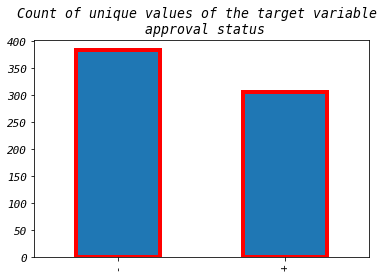

In [713]:
print(creditap['ApprovalStatus'].shape)
print(creditap['ApprovalStatus'].unique())
print(creditap['ApprovalStatus'].value_counts())
creditap['ApprovalStatus'].value_counts().plot(kind="bar", edgecolor='r', linewidth=4,
                                               title="Count of unique values of the target variable \n approval status")
plt.show()

#### Explore numerical variables

In [714]:
numbers = creditap.select_dtypes(include=np.number)
print(numbers.shape)
numbers.info()

(689, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 4 columns):
Debt             689 non-null float64
YearsEmployed    689 non-null float64
CreditScore      689 non-null int64
Income           689 non-null int64
dtypes: float64(2), int64(2)
memory usage: 21.6 KB


In [715]:
numbers_list = numbers.columns.to_list()

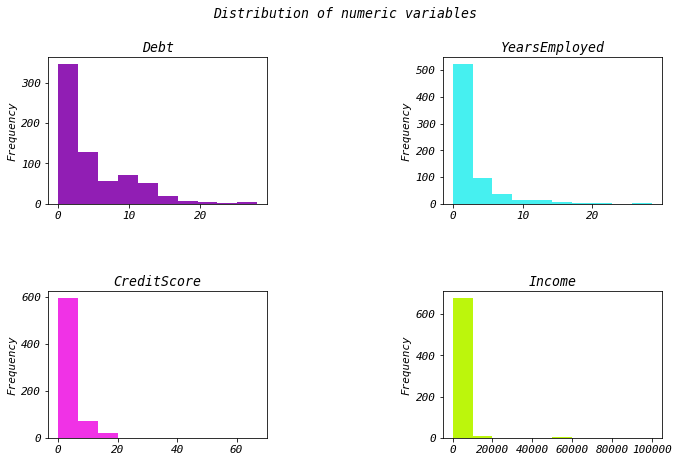

In [716]:
color_list=['#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe',
            '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe',
            '#f58231', '#911eb4', '#46f0f0', '#f032e6']

fig = plt.figure(figsize=(11,7))
fig.subplots_adjust(hspace=0.6, wspace=0.8)
fig.suptitle("Distribution of numeric variables")
for u,(i,j) in enumerate(zip(range(1,5), numbers_list)):
        ax = fig.add_subplot(2, 2, i)
        ax = numbers[j].plot.hist(color=color_list[i], 
                                  title=numbers_list[u])

#### Categorical variables

In [717]:
categorical = creditap.select_dtypes(include='object')
print(categorical.shape)
categorical.info()

(689, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 12 columns):
Gender            689 non-null object
Age               689 non-null object
Married           689 non-null object
BankCustomer      689 non-null object
EducationLevel    689 non-null object
Ethnicity         689 non-null object
PriorDefault      689 non-null object
Employed          689 non-null object
DriversLicense    689 non-null object
Citizen           689 non-null object
ZipCode           689 non-null object
ApprovalStatus    689 non-null object
dtypes: object(12)
memory usage: 64.7+ KB


Age is a numerial variable, zip code is a qualitative variable with many categories, too many
to display here.

Some variables, such as social security numbers and zip codes, take numerical values, but are not quantitative: They are qualitative or categorical variables. The sum of two zip codes or social security numbers is not meaningful.
<a href="https://www.stat.berkeley.edu/~stark/SticiGui/Text/histograms.htm">Berkeley</a> 

In [718]:
categorical_2 = categorical.copy()

categorical_2=categorical_2.drop(columns=['Age', 'ZipCode'], axis=1)
categorical_2.shape

(689, 10)

Unique variables and counts of unique values.

In [719]:
print(creditap['Gender'].unique())
print(creditap['Gender'].value_counts())
print(creditap['Gender'].isnull().sum())

['a' 'b' '?']
b    467
a    210
?     12
Name: Gender, dtype: int64
0


In [720]:
count_unique_values = dict()

for i in range(len(categorical_2.columns)):
    values = categorical_2.iloc[:,i].value_counts()
    key = categorical_2.columns[i]
    count_unique_values [key] = values
    
print(count_unique_values.keys())
print(count_unique_values['Gender'])
print(count_unique_values['Married'])
print(count_unique_values['BankCustomer'])


dict_keys(['Gender', 'Married', 'BankCustomer', 'EducationLevel', 'Ethnicity', 'PriorDefault', 'Employed', 'DriversLicense', 'Citizen', 'ApprovalStatus'])
b    467
a    210
?     12
Name: Gender, dtype: int64
u    518
y    163
?      6
l      2
Name: Married, dtype: int64
g     518
p     163
?       6
gg      2
Name: BankCustomer, dtype: int64


There are missing values labeled with a questionmark in the categorical variables.

In [792]:
list_keys = list(count_unique_values.keys())
for i, e in enumerate(list_keys):
    print(i, e)


0 Gender
1 Married
2 BankCustomer
3 EducationLevel
4 Ethnicity
5 PriorDefault
6 Employed
7 DriversLicense
8 Citizen
9 ApprovalStatus


Visualization of categorical variables.

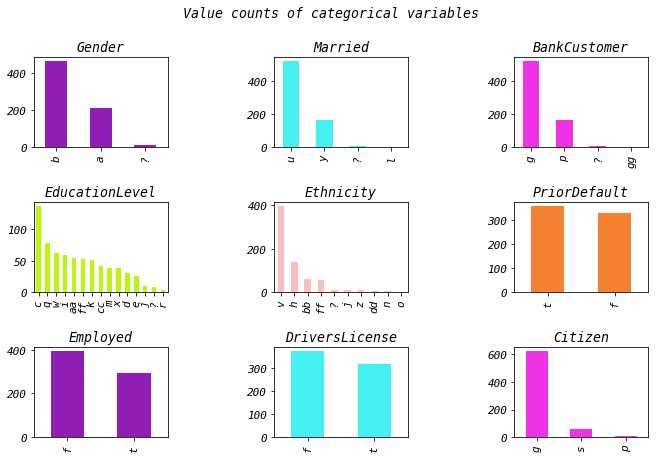

In [791]:
color_list=['#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe',
            '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe',
            '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#f58231']

fig = plt.figure(figsize=(11,7))
fig.subplots_adjust(hspace=0.6, wspace=0.8)
fig.suptitle("Value counts of categorical variables")
for u,(i,j) in enumerate(zip(range(1,10), list_keys)):
        ax = fig.add_subplot(3, 3, i)
        ax = count_unique_values[j].plot.bar(color=color_list[i], 
                                                 title=list_keys[u])

In which rows are the missing values labeled as questionmarks?

In [723]:

categorical_2 = categorical_2.dropna()
questionmarks = dict()
for i in range(len(categorical_2.columns)):
    df = categorical_2[categorical_2.iloc[:,i].str.contains('\?')]
    key = categorical_2.columns[i]
    questionmarks[key] = df
    
print(questionmarks.keys())


dict_keys(['Gender', 'Married', 'BankCustomer', 'EducationLevel', 'Ethnicity', 'PriorDefault', 'Employed', 'DriversLicense', 'Citizen', 'ApprovalStatus'])


In [724]:
questionmarks_df = pd.concat(questionmarks.values(), ignore_index=False)
print(questionmarks_df.shape)
print(questionmarks_df.head())
print(questionmarks_df.tail())


(42, 10)
    Gender Married BankCustomer EducationLevel Ethnicity PriorDefault  \
247      ?       u            g              c        bb            t   
326      ?       u            g              i        bb            f   
345      ?       u            g              c         v            f   
373      ?       u            g             aa         v            f   
452      ?       u            g              w         v            f   

    Employed DriversLicense Citizen ApprovalStatus  
247        t              f       g              +  
326        f              f       s              -  
345        f              t       g              -  
373        f              f       g              -  
452        f              t       g              -  
    Gender Married BankCustomer EducationLevel Ethnicity PriorDefault  \
478      ?       y            p              ?         ?            f   
538      b       u            g              ?         ?            t   
591      b     

Rows with questionmarks.

In [725]:
print(questionmarks_df.index.sort_values())

Int64Index([205, 205, 205, 205, 247, 269, 269, 269, 269, 326, 329, 329, 329,
            329, 345, 373, 452, 455, 455, 455, 455, 478, 478, 478, 488, 519,
            538, 538, 591, 591, 591, 591, 597, 600, 600, 600, 621, 621, 621,
            621, 640, 672],
           dtype='int64')


#### Missing values

<p>Replacing ? witn np.nan.</p> 

In [726]:
missing_values = creditap.isnull().sum()
missing_values

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
ApprovalStatus    0
dtype: int64

Questionsmarks are missing values, but not recognized as such by pandas.
Those are replaced with np.nan. 
This makes it possible to drop those with pandas.

In [727]:
creditap_2 = creditap.replace('?', np.nan)

In [728]:
# creditap_2[creditap_2['Age'] == 'a']

creditap_2['Age'] = creditap_2['Age'].astype('float')
print(creditap_2['Age'].dtype)


float64


In [729]:
missing_values_2 = creditap_2.isnull().sum()
print(missing_values_2.sum())
missing_values_2

67


Gender            12
Age               12
Debt               0
Married            6
BankCustomer       6
EducationLevel     9
Ethnicity          9
YearsEmployed      0
PriorDefault       0
Employed           0
CreditScore        0
DriversLicense     0
Citizen            0
ZipCode           13
Income             0
ApprovalStatus     0
dtype: int64

The missing values coded as np.nan are now visible.

There is indication that there is a value 28.42 in the numerical value in the categorical columns.
This makes no sense and can hinder further data processing. There this is checked now.

In [730]:
creditap_2[creditap_2.Gender ==  28.42].head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus


In [731]:
print(type(creditap_2.loc[373, 'Gender']))

<class 'float'>


In [732]:
creditap_2[creditap_2.Age ==  28.42].head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
128,a,28.42,3.5,u,g,w,v,0.835,t,f,0,f,s,00280,0,+


In [733]:
print(type(creditap_2.loc[128, 'Age']))

<class 'numpy.float64'>


In [734]:
def unique_cols(df):
    count_unique = dict()
    for i in range(len(df.columns)):
        if df.iloc[:,i].dtype == 'object':
            unique_values = df.iloc[:,i].unique()
            key = df.columns[i]
            
            count_unique[key] = unique_values
    return count_unique

    

In [735]:
count_unique_2 = unique_cols(creditap_2)
print(list(count_unique_2.keys()))

['Gender', 'Married', 'BankCustomer', 'EducationLevel', 'Ethnicity', 'PriorDefault', 'Employed', 'DriversLicense', 'Citizen', 'ZipCode', 'ApprovalStatus']


In [736]:
# print all but ZipCode
# making a function returning all but one key in a dict
def exclude_from_dict(dictionary, name):
    cat_cols_ex = {}
    for key, value in dictionary.items():
        if key != name:
            cat_cols_ex[key]=value
    return cat_cols_ex

cat_cols_28_1=exclude_from_dict(count_unique_2, 'ZipCode')

for key, value in cat_cols_28_1.items():
    print(key, value)

Gender ['a' 'b' nan]
Married ['u' 'y' nan 'l']
BankCustomer ['g' 'p' nan 'gg']
EducationLevel ['q' 'w' 'm' 'r' 'cc' 'k' 'c' 'd' 'x' 'i' 'e' 'aa' 'ff' 'j' nan]
Ethnicity ['h' 'v' 'bb' 'ff' 'j' 'z' nan 'o' 'dd' 'n']
PriorDefault ['t' 'f']
Employed ['t' 'f']
DriversLicense ['f' 't']
Citizen ['g' 's' 'p']
ApprovalStatus ['+' '-']


There is indeed a unique value 28.42. This value makes none sense in a categorical variable
and is therefore replaced.

In [737]:
creditap_2.isnull().sum()

Gender            12
Age               12
Debt               0
Married            6
BankCustomer       6
EducationLevel     9
Ethnicity          9
YearsEmployed      0
PriorDefault       0
Employed           0
CreditScore        0
DriversLicense     0
Citizen            0
ZipCode           13
Income             0
ApprovalStatus     0
dtype: int64

In [738]:
cat_cols_28_2 = list(cat_cols_28_1.keys())
print(cat_cols_28_2)

['Gender', 'Married', 'BankCustomer', 'EducationLevel', 'Ethnicity', 'PriorDefault', 'Employed', 'DriversLicense', 'Citizen', 'ApprovalStatus']


In [739]:
# creditap_2[cat_cols_28_2].replace(to_replace=28.42, value=np.nan, inplace=True)
creditap_2[cat_cols_28_2].copy().replace(to_replace=28.42, value=np.nan, inplace=True)

In [740]:
count_unique_3 = unique_cols(creditap_2)
print(list(count_unique_3.keys()))
cat_cols_28_2=exclude_from_dict(count_unique_3, 'ZipCode')

for key, value in cat_cols_28_2.items():
    print(key, value)

['Gender', 'Married', 'BankCustomer', 'EducationLevel', 'Ethnicity', 'PriorDefault', 'Employed', 'DriversLicense', 'Citizen', 'ZipCode', 'ApprovalStatus']
Gender ['a' 'b' nan]
Married ['u' 'y' nan 'l']
BankCustomer ['g' 'p' nan 'gg']
EducationLevel ['q' 'w' 'm' 'r' 'cc' 'k' 'c' 'd' 'x' 'i' 'e' 'aa' 'ff' 'j' nan]
Ethnicity ['h' 'v' 'bb' 'ff' 'j' 'z' nan 'o' 'dd' 'n']
PriorDefault ['t' 'f']
Employed ['t' 'f']
DriversLicense ['f' 't']
Citizen ['g' 's' 'p']
ApprovalStatus ['+' '-']


In [741]:
print(creditap_2.Gender.unique())

['a' 'b' nan]


In [742]:
creditap_2.isnull().sum()

Gender            12
Age               12
Debt               0
Married            6
BankCustomer       6
EducationLevel     9
Ethnicity          9
YearsEmployed      0
PriorDefault       0
Employed           0
CreditScore        0
DriversLicense     0
Citizen            0
ZipCode           13
Income             0
ApprovalStatus     0
dtype: int64

In [743]:
print(creditap_2.Gender.unique())
print(creditap_2.Married.unique())

['a' 'b' nan]
['u' 'y' nan 'l']


#### Imputing numeric values

In the next step the missing values in the numeric columns are imputed with the median.
The median is less disturbed than the mean by outliers.

In [744]:
creditap_3 = creditap_2.copy()

numeric_cols = []

for i in creditap_3.columns:
    if creditap_3[i].dtype in ['int64', 'float64']:
        numeric_cols.append(i)
        creditap_3[i].fillna(creditap_3[i].median(), inplace=True)

print(numeric_cols)

['Age', 'Debt', 'YearsEmployed', 'CreditScore', 'Income']


In [745]:
print(creditap_3.Gender.unique())

['a' 'b' nan]


In [746]:
for col in numeric_cols:
    print(creditap[i].isnull().sum())

0
0
0
0
0


In [747]:
print(creditap_2.Gender.unique())

['a' 'b' nan]


#### Imputing categorical variables

In [748]:
categorical_cols = []

for i in creditap_3.columns:
    if creditap_3[i].dtype == 'object':
        categorical_cols.append(i)
        creditap_3[i]=creditap_3[i].fillna(creditap_3[i].value_counts().index[1])
        
print(categorical_cols)

['Gender', 'Married', 'BankCustomer', 'EducationLevel', 'Ethnicity', 'PriorDefault', 'Employed', 'DriversLicense', 'Citizen', 'ZipCode', 'ApprovalStatus']


In [749]:
missing_values_3 = creditap_3.isnull().sum()
missing_values_3

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
ApprovalStatus    0
dtype: int64

In [750]:
print(creditap_3.Gender.unique())


['a' 'b']


#### Encoding of categorical variables

##### <b>The problem with zip code as a categorical, qualitative variable</b>

<p>
arises because the level of measurement of zip code and similar variables is nominal
with no inherent ranking. Encoding it with an integer label could lead to a distorted ranking
and mislead the algorithms to interpret the ranking as weights. 
Similar encoding zip code with dummy variables would lead to 170 - 1 new columns and
putting strain on the computations.
Frequency encoding offers an alternative to label encoding in this case.
</p> 

Frequency encoding: It is a way to utilize the frequency of the categories as labels. In the cases where the frequency is related somewhat with the target variable, it helps the model to understand and assign the weight in direct and inverse proportion, depending on the nature of the data.
</p> 

<a href="https://www.datacamp.com/community/tutorials/encoding-methodologies">Datacamp</a>

<p>
Obviously the frequency is related with the target variable here.
</p> 

In [751]:
print(creditap['ZipCode'].value_counts().head())
print(creditap['ZipCode'].value_counts().shape)

00000    132
00120     35
00200     35
00160     34
00100     30
Name: ZipCode, dtype: int64
(170,)


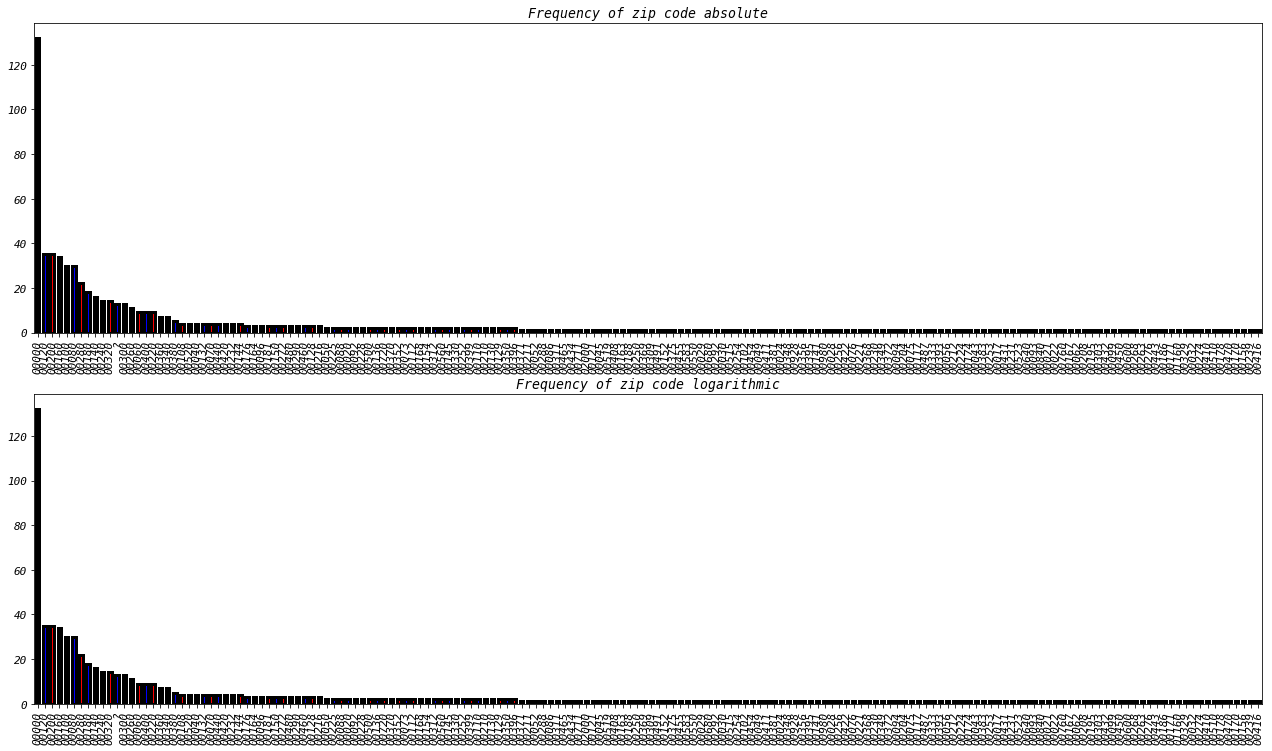

In [752]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(22, 6))
plt.subplots_adjust(top=1.7)

creditap['ZipCode'].value_counts().plot.bar(ax=ax1, title="Frequency of zip code absolute", 
                                            edgecolor='black', linewidth=3, color=['r', 'b'])
creditap['ZipCode'].value_counts().plot.bar(ax=ax2, title="Frequency of zip code logarithmic",
                                            edgecolor='black', linewidth=3, color=['r', 'b'])
plt.show()




In [753]:
creditap_4a = creditap_3.copy()

In [754]:
zip_vc = creditap_4a['ZipCode'].value_counts().sort_values(ascending=False)
zip_vc_df = pd.DataFrame(zip_vc)

print(type(zip_vc_df))
print(zip_vc_df.shape)
print(zip_vc_df.head())

<class 'pandas.core.frame.DataFrame'>
(169, 1)
       ZipCode
00000      132
00200       48
00120       35
00160       34
00100       30


In [755]:
zip_vc_df = \
zip_vc_df.reset_index().rename(columns={'index':'Zip_Code', 'ZipCode':'frequency'})

# Instead of immediate frequencies proportions are used to avoid 
# overweighting of the feature
zip_vc_df['percentile_rank']= zip_vc_df['frequency'].rank()
zip_vc_df['proportions']=round(zip_vc_df['frequency']/sum(zip_vc_df['frequency']),4)

print(zip_vc_df.head())

  Zip_Code  frequency  percentile_rank  proportions
0    00000        132            169.0       0.1916
1    00200         48            168.0       0.0697
2    00120         35            167.0       0.0508
3    00160         34            166.0       0.0493
4    00100         30            164.5       0.0435


In [756]:
dict_zip = pd.DataFrame(zip_vc_df.proportions.values, index=zip_vc_df.Zip_Code).to_dict()
dict_zip_2 = dict_zip[0]
dict_df = pd.DataFrame.from_dict(dict_zip_2,  orient='index')

print("Complete shape: ", creditap_4a.shape)
print("Counts_of_unique_zipcode_values: ", dict_df.shape)
print(dict_df.head())

Complete shape:  (689, 16)
Counts_of_unique_zipcode_values:  (169, 1)
            0
00000  0.1916
00200  0.0697
00120  0.0508
00160  0.0493
00100  0.0435


In [757]:
mapper_1 =creditap_4a['ZipCode'].map(dict_zip_2)

print(type(mapper_1))
print(mapper_1.shape)
print(mapper_1.head())

<class 'pandas.core.series.Series'>
(689,)
0    0.0015
1    0.0319
2    0.0435
3    0.0508
4    0.0102
Name: ZipCode, dtype: float64


(689,)
0    0.0015
1    0.0319
2    0.0435
3    0.0508
4    0.0102
Name: ZipCode, dtype: float64


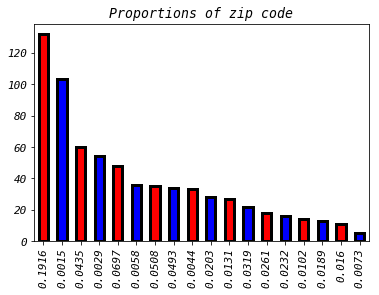

In [758]:
creditap_4a['ZipCode'] = mapper_1

print(creditap_4a['ZipCode'].shape)
print(creditap_4a['ZipCode'].head())

compare_zip = \
pd.concat([pd.DataFrame(creditap_3['ZipCode']), pd.DataFrame(creditap_4a['ZipCode'] )], axis=1)

compare_zip.rename(columns = {'ZipCode': 'ZipCode_frequency', 'ZipCode': 'ZipCode_proportions'}, inplace=True)
compare_zip.tail()

creditap_4a['ZipCode'].value_counts().plot.bar(title="Proportions of zip code", 
                                            edgecolor='black', linewidth=3, color=['r', 'b'])

In [759]:
creditap_4 = creditap_4a.copy()
cat_mask = creditap_4.dtypes == 'object'
print(cat_mask )

Gender             True
Age               False
Debt              False
Married            True
BankCustomer       True
EducationLevel     True
Ethnicity          True
YearsEmployed     False
PriorDefault       True
Employed           True
CreditScore       False
DriversLicense     True
Citizen            True
ZipCode           False
Income            False
ApprovalStatus     True
dtype: bool


In [760]:
cat_cols = creditap_4.columns[cat_mask].to_list()

print(cat_cols)
print(creditap_4[cat_cols].shape)
print(creditap_4.Gender.unique())
# print(creditap_4['Gender'])

['Gender', 'Married', 'BankCustomer', 'EducationLevel', 'Ethnicity', 'PriorDefault', 'Employed', 'DriversLicense', 'Citizen', 'ApprovalStatus']
(689, 10)
['a' 'b']


In [761]:
# instantiate the LabelEncoder
le = preprocessing.LabelEncoder()

# apply LabelEncoder on the categorical features
creditap_4[cat_cols] = creditap_4[cat_cols].apply(lambda col: le.fit_transform(col))

print(creditap_4[cat_cols].head())



   Gender  Married  BankCustomer  EducationLevel  Ethnicity  PriorDefault  \
0       0        1             0              10          3             1   
1       0        1             0              10          3             1   
2       1        1             0              12          7             1   
3       1        1             0              12          7             1   
4       1        1             0               9          7             1   

   Employed  DriversLicense  Citizen  ApprovalStatus  
0         1               0        0               0  
1         0               0        0               0  
2         1               1        0               0  
3         0               0        2               0  
4         0               1        0               0  


#### Are all variables numeric now?

In [762]:
creditap_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 16 columns):
Gender            689 non-null int32
Age               689 non-null float64
Debt              689 non-null float64
Married           689 non-null int32
BankCustomer      689 non-null int32
EducationLevel    689 non-null int32
Ethnicity         689 non-null int32
YearsEmployed     689 non-null float64
PriorDefault      689 non-null int32
Employed          689 non-null int32
CreditScore       689 non-null int64
DriversLicense    689 non-null int32
Citizen           689 non-null int32
ZipCode           689 non-null float64
Income            689 non-null int64
ApprovalStatus    689 non-null int32
dtypes: float64(4), int32(10), int64(2)
memory usage: 59.3 KB


In [794]:
c4_cols_list = creditap_4.columns.to_list()
print(c4_cols_list)
print(len(c4_cols_list))
print(numbers_list)
print(len(color_list))

['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'EducationLevel', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore', 'Citizen', 'ZipCode', 'Income', 'ApprovalStatus']
14
['Debt', 'YearsEmployed', 'CreditScore', 'Income']
17


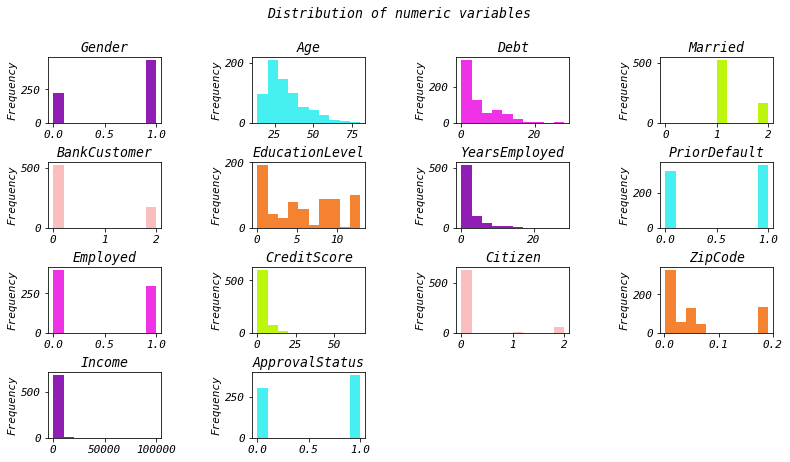

In [797]:

fig = plt.figure(figsize=(13,7))
fig.subplots_adjust(hspace=0.6, wspace=0.8)
fig.suptitle("Distribution of variables")
for u,(i,j) in enumerate(zip(range(1,17), c4_cols_list)):
        ax = fig.add_subplot(4, 4, i)
        ax = creditap_4[j].plot.hist(color=color_list[i], 
                                  title=c4_cols_list[u])

#### Feature selection

<p>
based on domain knowledge.
</p>

<p>
Drivers License could be only indicator for repayment capability. 
A driver license could be a prerequiste for income, but in this case it would be correlated to income
and is subject to multicolinearity. Drivers license is dropped.
Ethnicity can be an indicator for repayment capability. On the other hand relying on Ethnicity as
a feature is ethically controversial. Further considerations and preparations would be needed
to maintain it as a feature. Therefore it is simply dropped here.
</p> 

In [763]:
creditap_4 = creditap_4.drop(['Ethnicity', 'DriversLicense'], axis=1)

#### Feature selection based on correlation

<p>considering a correlation of 0.5 between variables as strong and indicating
therefore multicollinearity no feature seem to have such a strong correlation.</p> 

In [764]:
correlations_1 = creditap.corr()
print(correlations_1)

                   Debt  YearsEmployed  CreditScore    Income
Debt           1.000000       0.298714     0.271003  0.122935
YearsEmployed  0.298714       1.000000     0.322247  0.051267
CreditScore    0.271003       0.322247     1.000000  0.063616
Income         0.122935       0.051267     0.063616  1.000000


In [765]:
(correlations_1[correlations_1 < 0.5]).replace(np.nan, 'Self')

,Debt,YearsEmployed,CreditScore,Income
Debt,Self,0.298714,0.271003,0.122935
YearsEmployed,0.298714,Self,0.322247,0.0512669
CreditScore,0.271003,0.322247,Self,0.0636163
Income,0.122935,0.0512669,0.0636163,Self


In [766]:
creditap_b = creditap
creditap_b['ApprovalStatus'] = creditap_b['ApprovalStatus'].replace('+', 1).replace('-', 0)
creditap_b['ApprovalStatus'].value_counts()


0    383
1    306
Name: ApprovalStatus, dtype: int64

#### Correlations between the features and the target variables
<p>is considered to weak, when below 0.1.</p> 


In [767]:
correlations_with_target=\
creditap_b.corr()['ApprovalStatus'].dropna().reset_index().rename(columns={'index':'feature'}). \
sort_values(by='ApprovalStatus', ascending=False).reset_index(drop=True).iloc[1:]

print(correlations_with_target)

         feature  ApprovalStatus
1    CreditScore        0.407270
2  YearsEmployed        0.323260
3           Debt        0.208171
4         Income        0.176138


CreditScore has the highest correlation to ApprovalStatus. Intuitively this make sense.
High income may support repayment but can for example be contradicted by expenses.
Not any is below 0.1.

#### Is scaling (normalization) necessary?
<p>
It is in generally necessary, when the value ranges of the variables varies widely. 
In many machine learning algorithms wide spreads of the data can influence the outputs
unreasonable. Normalization makes the ranges of the features more proportionally to each other.
</p> 


In [768]:
cat_cols_44 = \
creditap_3.select_dtypes(include='object').drop(['Ethnicity', 'DriversLicense'], axis=1).columns.to_list()
print(cat_cols_44)

['Gender', 'Married', 'BankCustomer', 'EducationLevel', 'PriorDefault', 'Employed', 'Citizen', 'ZipCode', 'ApprovalStatus']


In [769]:
def data_range(s):
    min_a = round(s.min(), 2)
    max_b = round(s.max(), 2)
    d = max_b - min_a
    return d

agg_4 = creditap_4.drop(cat_cols_44, axis=1).agg(['min', 'max' , data_range])
agg_4


,Age,Debt,YearsEmployed,CreditScore,Income
min,13.75,0.0,0.0,0,0
max,80.25,28.0,28.5,67,100000
data_range,66.50,28.0,28.5,67,100000


In [770]:
print(agg_4.loc['data_range', :].sort_values())

Debt                 28.0
YearsEmployed        28.5
Age                  66.5
CreditScore          67.0
Income           100000.0
Name: data_range, dtype: float64


There is a spread between 28 and 10.000. Scaling is therefore justified, but done after splitting the data
into train and test partition, because otherwise information could be 'leaked' between these.


### Doing a train-test-split

In [771]:
print(creditap_4.shape)
for i,b in enumerate(creditap_4.columns):
    print(i, b)

(689, 14)
0 Gender
1 Age
2 Debt
3 Married
4 BankCustomer
5 EducationLevel
6 YearsEmployed
7 PriorDefault
8 Employed
9 CreditScore
10 Citizen
11 ZipCode
12 Income
13 ApprovalStatus


In [772]:
creditap_array = creditap_4.values
print(creditap_array.shape)
X,y = creditap_array[:,0:12], creditap_array[:,13]

(689, 14)


In [773]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)

print(X_train.shape)
print(X_train.dtype)
print(type(X_train))

print(X_test.shape)
print(X_test.dtype)
print(type(X_test))

(461, 12)
float64
<class 'numpy.ndarray'>
(228, 12)
float64
<class 'numpy.ndarray'>


In [774]:
scaler = MinMaxScaler(feature_range=(0,1))

X_train_scaled = scaler.fit_transform(X_train)
print(type(X_train_scaled))
X_test_scaled = scaler.fit_transform(X_test)
print(type(X_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


### Data modeling: fitting a random classifier model
<p>as a base model.</p> 

In [775]:
clf_random = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
clf_random.fit(X_train_scaled, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [776]:
random_pred = clf_random.predict(X_test_scaled)
print(random_pred[:10])

random_score = clf_random.score(X_test_scaled, y_test)
print('Accuracy random forest model:', random_score)

confusion_random = confusion_matrix(y_test, random_pred)
print(confusion_random)

tn, fp, fn, tp = confusion_matrix(y_test, random_pred).ravel()
print(tn, fp, fn, tp)

[1. 1. 1. 1. 1. 0. 1. 1. 0. 1.]
Accuracy random forest model: 0.8333333333333334
[[ 81  19]
 [ 19 109]]
81 19 19 109


### Data modeling: fitting a logistic regression model
<p>to compare it with the random forest model.</p> 

In [777]:
logisticregression = LogisticRegression(solver='liblinear', random_state=42)
logisticregression.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [778]:
log_pred = logisticregression.predict(X_test_scaled)
print(log_pred[:10])

log_score = logisticregression.score(X_test_scaled, y_test)
print('Accuracy logistic regression model:', log_score)

confusion_log = confusion_matrix(y_test, log_pred)
print(confusion_log)

[1. 1. 1. 1. 1. 0. 1. 0. 0. 1.]
Accuracy logistic regression model: 0.8728070175438597
[[ 96   4]
 [ 25 103]]


Compared with the accuracy of 0.83 of the random forest model, the accuracy of the logistic regression model
is better with ca. 0.87. In the next step a GridSearchCV over some parameters is conducted to find the 
parameters with the best accuracy.


### Data modeling: fitting a grid search with logistic regression estimator

In [779]:
tol = [1, 0.1, 0.01, 0.001, 0.0001]
max_iter = [100, 150, 200]
solver = ['newton-cg', 'lbfgs', 'liblinear']

param_grid = dict(tol=tol, max_iter=max_iter, solver=solver)

In [780]:
gridsearch = GridSearchCV(estimator=logisticregression, param_grid=param_grid, cv=5, iid=False)
gridsearch_scaled = scaler.fit_transform(X)
gridsearch.fit(gridsearch_scaled, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid=False, n_jobs=None,
       param_grid={'tol': [1, 0.1, 0.01, 0.001, 0.0001], 'max_iter': [100, 150, 200], 'solver': ['newton-cg', 'lbfgs', 'liblinear']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [781]:
grid_score = gridsearch.best_score_
print("Gridsearch best accuracy score:", grid_score)

grid_bestparams = gridsearch.best_params_
print("Gridsearch params for best accuracy score:", grid_bestparams)

Gridsearch best accuracy score: 0.8551703353280562
Gridsearch params for best accuracy score: {'max_iter': 100, 'solver': 'liblinear', 'tol': 1}


### Conclusion

<p>There was some substantial effort necessary to clean and prepare the data.
The best accuracy was achieved with the basic logistic regression model applying the
'liblinear'-solver. This does not mean further hyperparameter tuning cannot achieve
a better accuracy. So other algorithms can be applied.
</p> 
